In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator


In [5]:
# Replace 'your_dataset.csv' with the actual file name and path
file_path = 'us.csv'

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())


         date  cases  deaths
0  2020-01-21      1       0
1  2020-01-22      1       0
2  2020-01-23      1       0
3  2020-01-24      2       0
4  2020-01-25      3       0


In [12]:
# Replace 'your_dataset.csv' with the actual file name and path
file_path2 = 'us-counties-2020.csv'

# Load the dataset into a Pandas DataFrame
df2 = pd.read_csv(file_path2)

# Display the first few rows of the dataset
print(df2.head())

         date     county       state     fips  cases  deaths
0  2020-01-21  Snohomish  Washington  53061.0      1     0.0
1  2020-01-22  Snohomish  Washington  53061.0      1     0.0
2  2020-01-23  Snohomish  Washington  53061.0      1     0.0
3  2020-01-24       Cook    Illinois  17031.0      1     0.0
4  2020-01-24  Snohomish  Washington  53061.0      1     0.0


In [13]:
# Replace 'your_dataset.csv' with the actual file name and path
file_path3 = 'mask-use-by-county.csv'

# Load the dataset into a Pandas DataFrame
df3 = pd.read_csv(file_path3)

# Display the first few rows of the dataset
print(df3.head())

   COUNTYFP  NEVER  RARELY  SOMETIMES  FREQUENTLY  ALWAYS
0      1001  0.053   0.074      0.134       0.295   0.444
1      1003  0.083   0.059      0.098       0.323   0.436
2      1005  0.067   0.121      0.120       0.201   0.491
3      1007  0.020   0.034      0.096       0.278   0.572
4      1009  0.053   0.114      0.180       0.194   0.459


The New York Times is releasing a series of data files with cumulative counts of coronavirus cases in the United States, at the state and county level, over time. We are compiling this time series data from state and local governments and health departments in an attempt to provide a complete record of the ongoing outbreak.

Since the first reported coronavirus case in Washington State on Jan. 21, 2020, The Times has tracked cases of coronavirus in real time as they were identified after testing. Because of the widespread shortage of testing, however, the data is necessarily limited in the picture it presents of the outbreak.

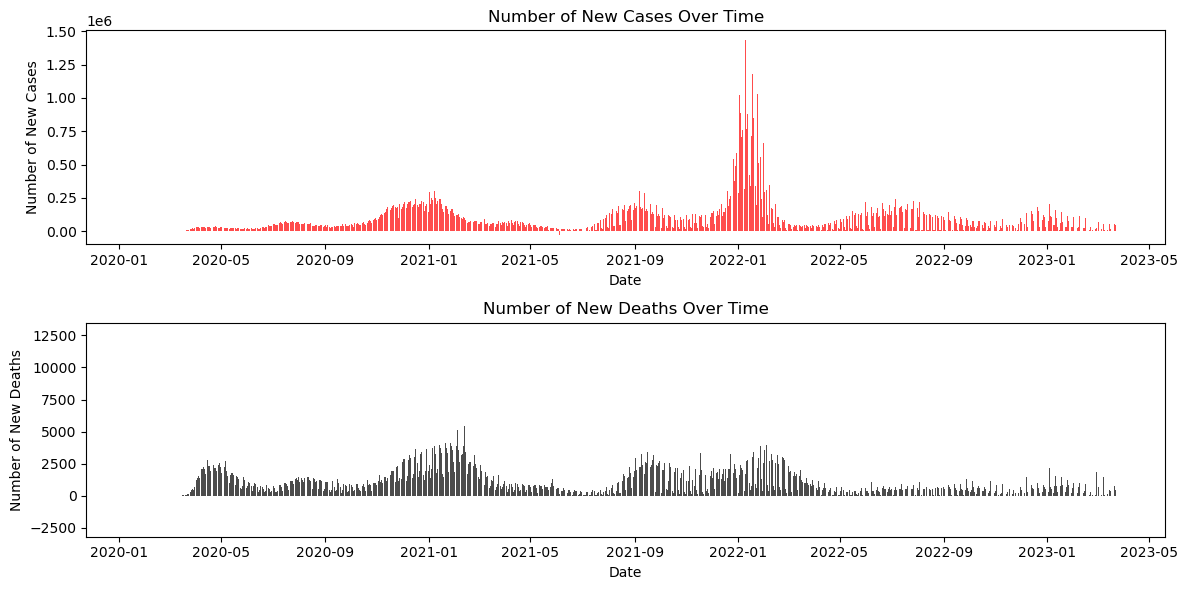

In [8]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Calculate daily increments for cases and deaths
df['new_cases'] = df['cases'].diff().fillna(0)
df['new_deaths'] = df['deaths'].diff().fillna(0)

# Plotting
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Number of new cases over time
plt.subplot(2, 1, 1)
plt.bar(df['date'], df['new_cases'], color='r', alpha=0.7)
plt.title('Number of New Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of New Cases')

# Number of new deaths over time
plt.subplot(2, 1, 2)
plt.bar(df['date'], df['new_deaths'], color='black', alpha=0.7)
plt.title('Number of New Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Number of New Deaths')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

### survery at 17 JUL 2020
https://www.nytimes.com/interactive/2020/07/17/upshot/coronavirus-face-mask-map.html

Mask-Wearing Survey Data
The New York Times is releasing estimates of mask usage by county in the United States.

This data comes from a large number of interviews conducted online by the global data and survey firm Dynata at the request of The New York Times. The firm asked a question about mask use to obtain 250,000 survey responses between July 2 and July 14, enough data to provide estimates more detailed than the state level. (Several states have imposed new mask requirements since the completion of these interviews.)

Specifically, each participant was asked: How often do you wear a mask in public when you expect to be within six feet of another person?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


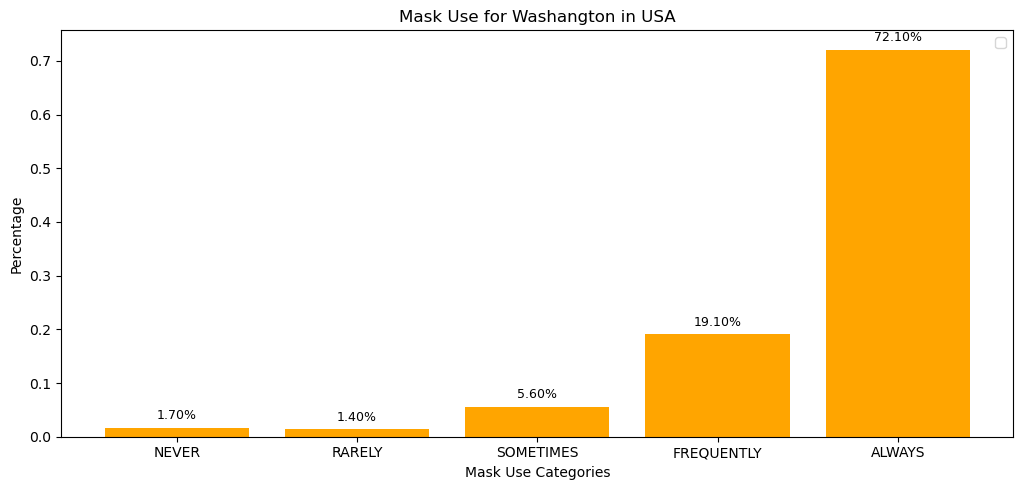

In [61]:
# Plotting for COUNTYFP 1001
plt.figure(figsize=(20, 5))  # Adjust the width of the plot

plt.subplot(1, 2, 1)
county_53061 = df3[df3['COUNTYFP'] == 53061]
bars = plt.bar(county_53061.columns[1:], county_53061.iloc[0, 1:], color='orange')

# Add annotations on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2%}', ha='center', va='bottom', fontsize=9, color='black')

# Add a red horizontal line representing the average
average_percentage = county_53061.iloc[0, 1:].astype(float).mean()


plt.title('Mask Use for Washington in USA')
plt.xlabel('Mask Use Categories')
plt.ylabel('Percentage')

# Display a legend
plt.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\Home\AppData\Local\Temp\ipykernel_8664\2170828142.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_fips_53061_filtered['new_cases'] = df2_fips_53061_filtered['cases'].diff().fillna(0)
C:\Users\Home\AppData\Local\Temp\ipykernel_8664\2170828142.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_fips_53061_filtered['new_cases'] = df2_fips_53061_filtered['new_cases'].apply(lambda x: max(0, x))  # Set negative values to zero
C:\Users\Home\AppData\Local\Temp\ipykernel_8664\2170828142.py:22:

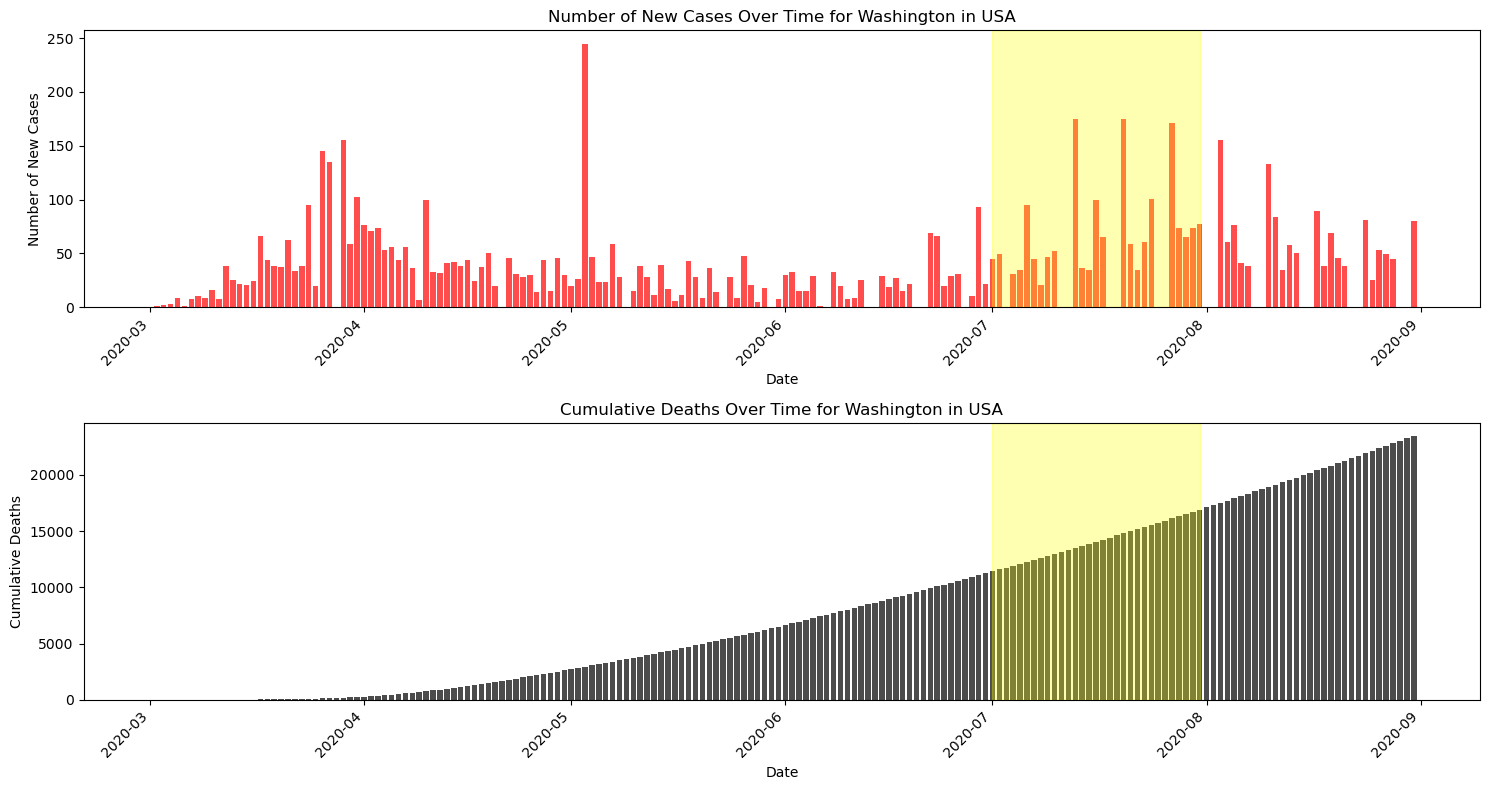

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator

# Assuming your DataFrame is already loaded, or load it using pd.read_csv() or other appropriate method
# df2 = pd.read_csv('your_dataset.csv')

# Convert the 'date' column to datetime format
df2['date'] = pd.to_datetime(df2['date'])

# Filter data for FIPS 53061 (Washington)
df2_fips_53061 = df2[df2['fips'] == 53061]

# Filter data from March 2020 to end of August 2020
start_date = pd.Timestamp('2020-03-01')
end_date = pd.Timestamp('2020-08-31')
df2_fips_53061_filtered = df2_fips_53061[(df2_fips_53061['date'] >= start_date) & (df2_fips_53061['date'] <= end_date)]

# Calculate daily increments for cases and cumulative deaths
df2_fips_53061_filtered['new_cases'] = df2_fips_53061_filtered['cases'].diff().fillna(0)
df2_fips_53061_filtered['new_cases'] = df2_fips_53061_filtered['new_cases'].apply(lambda x: max(0, x))  # Set negative values to zero
df2_fips_53061_filtered['cumulative_deaths'] = df2_fips_53061_filtered['deaths'].cumsum()

# Plotting
plt.figure(figsize=(15, 8))

# Number of new cases over time
plt.subplot(2, 1, 1)
plt.bar(df2_fips_53061_filtered['date'], df2_fips_53061_filtered['new_cases'], color='red', alpha=0.7)
plt.title('Number of New Cases Over Time for Washington in USA')
plt.xlabel('Date')
plt.ylabel('Number of New Cases')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.gca().xaxis.set_major_locator(MonthLocator())  # Show month names on x-axis

# Highlight July in the background
plt.axvspan(pd.Timestamp('2020-07-01'), pd.Timestamp('2020-07-31'), color='yellow', alpha=0.3)

# Cumulative deaths over time
plt.subplot(2, 1, 2)
plt.bar(df2_fips_53061_filtered['date'], df2_fips_53061_filtered['cumulative_deaths'], color='black', alpha=0.7)
plt.title('Cumulative Deaths Over Time for Washington in USA')
plt.xlabel('Date')
plt.ylabel('Cumulative Deaths')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.gca().xaxis.set_major_locator(MonthLocator())  # Show month names on x-axis

# Highlight July in the background
plt.axvspan(pd.Timestamp('2020-07-01'), pd.Timestamp('2020-07-31'), color='yellow', alpha=0.3)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


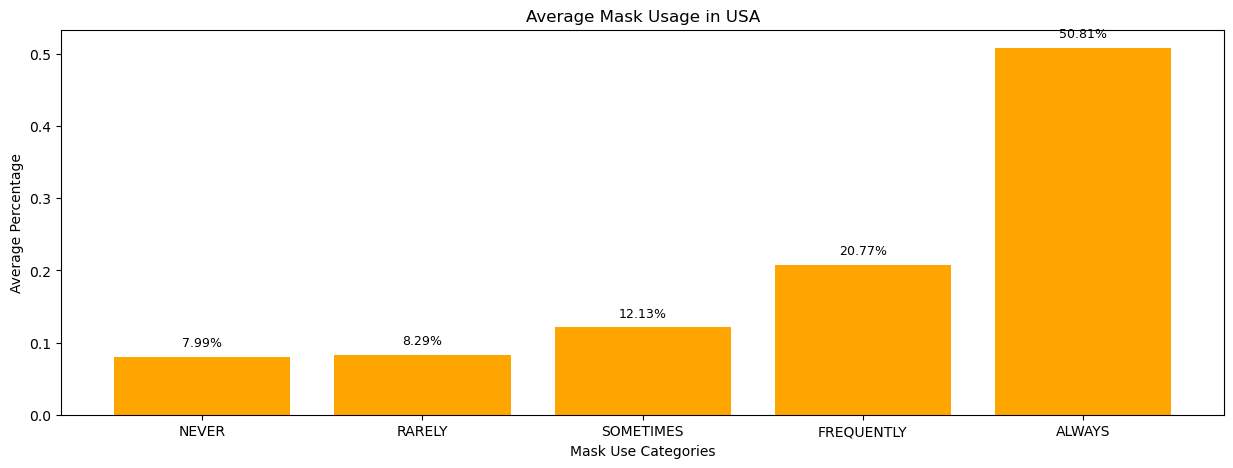

In [52]:
# Calculate the average for each response category across all counties
average_mask_usage = df3.iloc[:, 1:].mean()

# Plotting
plt.figure(figsize=(15, 5))
bars = plt.bar(average_mask_usage.index, average_mask_usage, color='orange')
plt.title('Average Mask Usage in USA')
plt.xlabel('Mask Use Categories')
plt.ylabel('Average Percentage')

# Add annotations on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2%}', ha='center', va='bottom', fontsize=9, color='black')

plt.show()

C:\Users\Home\AppData\Local\Temp\ipykernel_8664\1681581447.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['new_cases'] = df_2020['cases'].diff().fillna(0)
C:\Users\Home\AppData\Local\Temp\ipykernel_8664\1681581447.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['cumulative_deaths'] = df_2020['deaths'].cumsum()


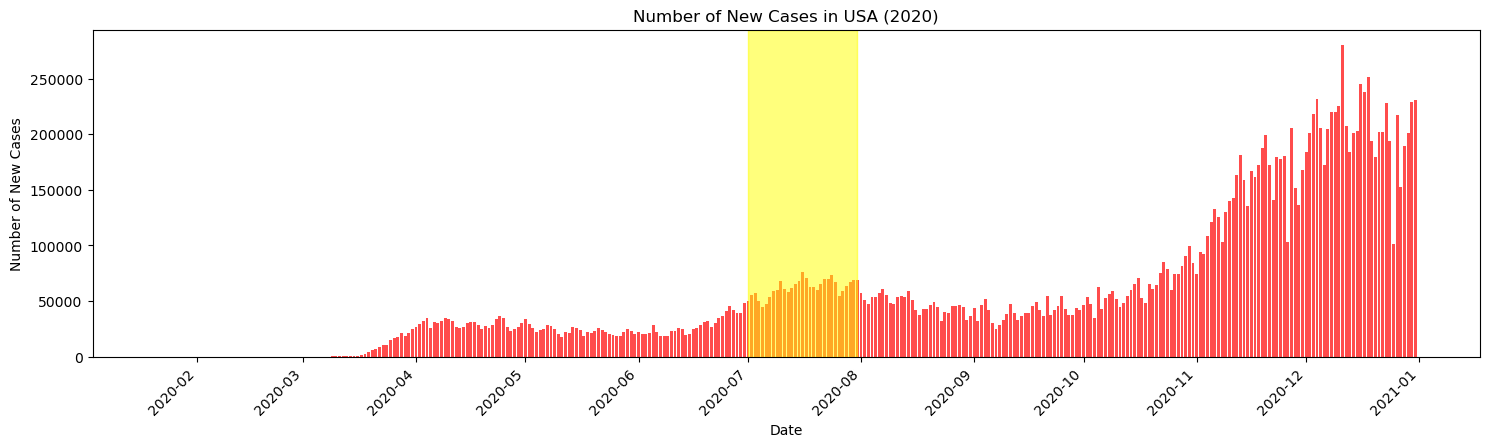

In [64]:
# Assuming your DataFrame is already loaded, or load it using pd.read_csv() or other appropriate method
# df = pd.read_csv('your_dataset.csv')

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter data for the year 2020
df_2020 = df[(df['date'] >= '2020-01-01') & (df['date'] <= '2020-12-31')]

# Calculate daily increments for cases and cumulative deaths
df_2020['new_cases'] = df_2020['cases'].diff().fillna(0)
df_2020['cumulative_deaths'] = df_2020['deaths'].cumsum()

# Plotting
plt.figure(figsize=(15, 8))

# Number of new cases over time in 2020
plt.subplot(2, 1, 1)
plt.bar(df_2020['date'], df_2020['new_cases'], color='red', alpha=0.7)
plt.title('Number of New Cases in USA (2020)')
plt.xlabel('Date')
plt.ylabel('Number of New Cases')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.gca().xaxis.set_major_locator(MonthLocator())  # Show month names on x-axis

# Highlight July in the background
plt.axvspan(pd.Timestamp('2020-07-01'), pd.Timestamp('2020-07-31'), color='yellow', alpha=0.3)

# # Cumulative deaths over time in 2020
# plt.subplot(2, 1, 2)
# plt.bar(df_2020['date'], df_2020['cumulative_deaths'], color='black', alpha=0.7)
# plt.title('Cumulative Deaths in USA (2020)')
# plt.xlabel('Date')
# plt.ylabel('Cumulative Deaths')
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
# plt.gca().xaxis.set_major_locator(MonthLocator())  # Show month names on x-axis

# Highlight July in the background
plt.axvspan(pd.Timestamp('2020-07-01'), pd.Timestamp('2020-07-31'), color='yellow', alpha=0.3)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()
